<center> <h1> <b>BIRDSONGS<b></h1> </center>
<center> <h1>Syllables Tutorial</h1> </center>

# Define Objects

Import package and define matplotlib backend

In [12]:
# the following line enable interact with figures, 
# you can make zoom and save images from a poup matplotlib window
# to select points: qt ipympl tk. To just visualize: notebook
%matplotlib ipympl

import birdsongs as bs
from birdsongs.utils import *

Define directories path and show audio files

In [2]:
# root_path   = "path_to_repository\\'
# audios_path = "audios_path\\'
# bird_name   = "Zonotrichia capensis"
# audios_path = "C:\\Users\\sebas\\Documents\\GitHub\\audios\\Dissertation-xeno\\"

paths  = bs.Paths()              # root_path, audios_path, bird_name
ploter = bs.Ploter(save=True)   # to save figures save=True 
paths.ShowFiles()

The folder has 4 songs
1-humman.wav
2-XC104508 - Ocellated Tapaculo - Acropternis orthonyx.wav
3-XC11293 - Rufous-collared Sparrow - Zonotrichia capensis.wav
4-XC513182 - Rufous-collared Sparrow - Zonotrichia capensis.wav


Define, visualize and hear birdsong

The son has 7 syllables


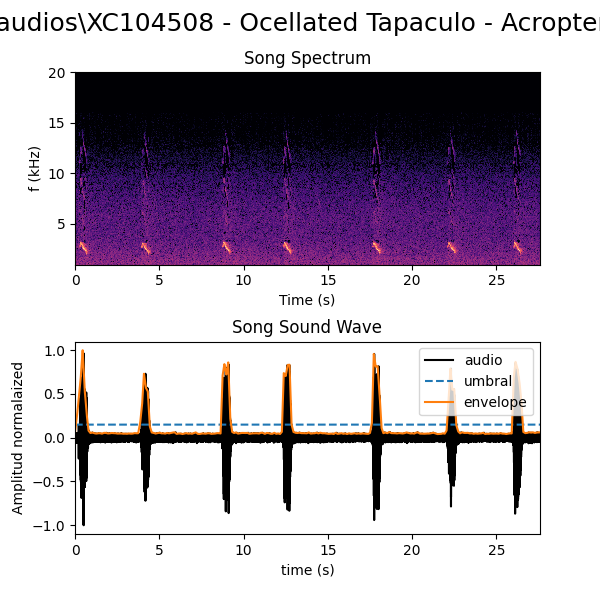

In [4]:
# no_file = int(input("Enter the number of song (1 to {0}): ".format(paths.no_files)))
birdsong = bs.BirdSong(paths, no_file=2, Nt=5000, umbral=0.15, 
               flim=(1e3,20e3), split_method="amplitud")
ploter.Plot(birdsong, FF_on=False)
AudioPlay(birdsong)

Select time inverval of interest

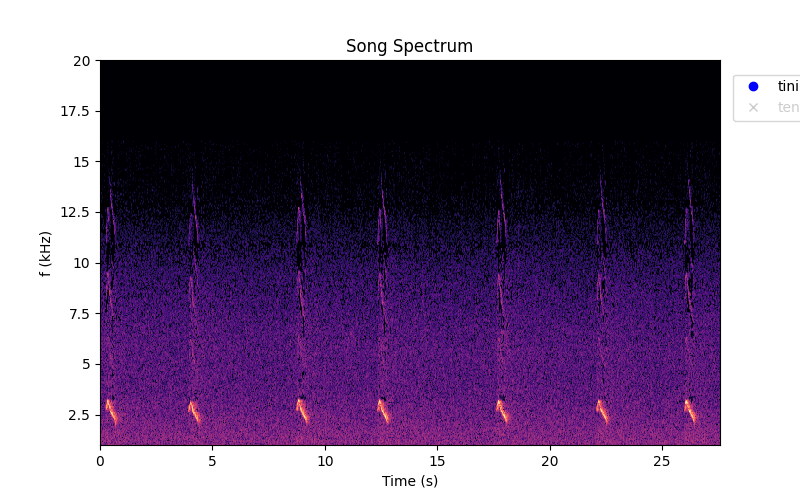

In [5]:
klicker = ploter.FindTimes(birdsong, FF_on=False)

In [6]:
time_interval = Positions(klicker)[0]
time_interval

array([8.7729994 , 9.16436858])

Define syllable by the previous time interval selected

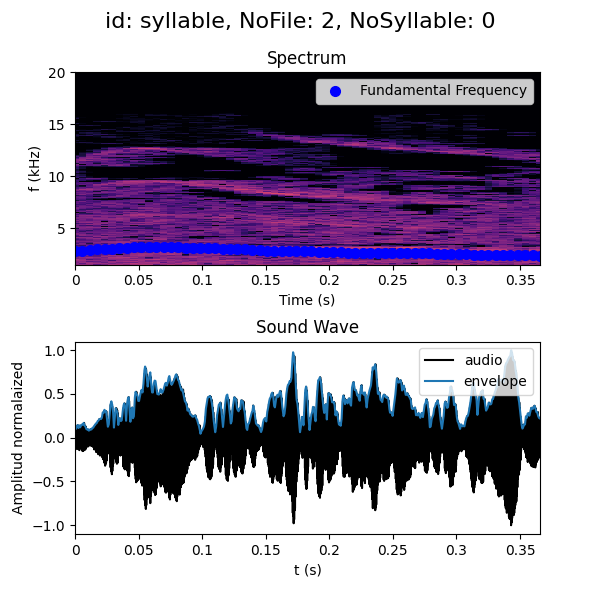

Wall time: 4.66 s


In [7]:
%%time
syllable = bs.Syllable(birdsong, tlim=time_interval, umbral_FF=1., Nt=30)
ploter.Plot(syllable)
AudioPlay(syllable)

Define syllable with the default syllable extractor

In [8]:
# no_syllable    = int(input("Enter the syllable number (1 to {0}): ".format(bird.no_syllables)))
# syllable       = birdsong.Syllable(no_syllable=3)
# ploter.Plot(syllable)
# AudioPlay(syllable)

In [ ]:
ploter.Plot(bird, FF_on=True, syllable_on=True, chunck_on=False)

# Optimal Synthetic Syllable

Define optimization method and its parameters 

In [9]:
brute     = {'method':'brute', 'Ns':11}
optimizer = bs.Optimizer(birdsong, method_kwargs=brute)
#?lmfit.minimize

Find optimal $\gamma$ for all the syllables computed by the syllables extractor. You can also just find the optimal for the single syllable

In [10]:
# optimal_gamma = optimizer.OptimalGamma(syllable)
optimal_gamma = optimizer.AllGammas(birdsong)

γ* =  50500, t=10.2023 min
γ* =  32500, t=8.7477 min
γ* =  37000, t=9.1461 min
γ* =  28000, t=9.5689 min
γ* =  10000, t=10.5218 min
γ* =  32500, t=9.1725 min
γ* =  28000, t=11.5445 min
Time of execution = 69.6127 minutes


In [11]:
syllable.p["gm"].set(value=optimal_gamma)
syllable.p

Parameters([('a0', <Parameter 'a0', value=0.11 (fixed), bounds=[0:0.25]>), ('a1', <Parameter 'a1', value=0.05 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.1 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=1 (fixed), bounds=[0.2:2]>), ('b2', <Parameter 'b2', value=0.0 (fixed), bounds=[0:3]>), ('gm', <Parameter 'gm', value=31214.285714285714 (fixed), bounds=[10000.0:100000.0]>)])

Optimal $\alpha$ and $\beta$

In [ ]:
optimizer.OptimalParams(syllable, Ns=21)

As
a_0*=0.1250, t=7.6313 min
a_1*=0.0000, t=8.8701 min
Bs


Display optimal parameters and generate a synthetic syllable 

In [ ]:
Display(syllable.p)
synth_syllable = syllable.Solve(syllable.p)

Visualize and plot the synthetic syllable

In [ ]:
ploter.PlotAlphaBeta(synth_syllable)
ploter.Result(syllable, synth_syllable)
# ploter.Syllables(syllable, synth_syllable)
AudioPlay(synth_syllable)

Write synthetic and real syllables

In [ ]:
syllable.WriteAudio(); synth_syllable.WriteAudio(); 